In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



Max wind speed=  32.97989844019469


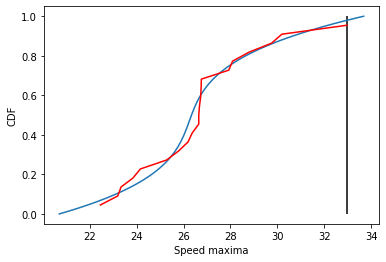

In [2]:
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

cprob = np.array([i/(years_nb+1) for i in range(1,years_nb+1)])
max_speeds=np.sort(max_speeds) #Max speeds now are sorted

from scipy.interpolate import UnivariateSpline
quantile = UnivariateSpline(cprob,max_speeds)

prob=np.linspace(0,1,100)

plt.plot(quantile(prob),prob)
plt.plot(max_speeds,cprob,'r')

fifty_prob = 1. - 0.02
fifty_wind = quantile(fifty_prob)

plt.xlabel('Speed maxima')
plt.ylabel('CDF')
plt.vlines(fifty_wind, 0, 1)
print('Max wind speed= ',fifty_wind)


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

[-8.45509777e+01  1.29044291e+01  1.31254399e+00  4.09378960e-01
 -1.61041767e-02 -5.36519674e-01]
[ 7.12775206  6.25919796  1.19366173  0.36665327 -0.01057645 -0.43704267]
The fit for maxima temperatures fit quite well the given data, on the other hand the results obtained for minima are not so satisfying but still correct


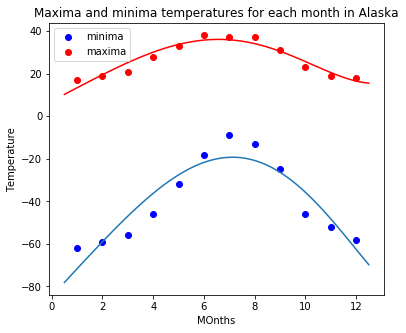

In [3]:
min_temp= np.array([-62,-59,-56,-46,-32,-18,-9,-13,-25,-46,-52,-58])
max_temp = np.array([17,19,21,28,33,38,37,37,31,23,19,18])

months=np.arange(1,13)
plt.figure(figsize=(6,5))
plt.plot(months,min_temp,'bo',label='minima')
plt.plot(months,max_temp,'ro',label='maxima')
plt.legend()
plt.title('Maxima and minima temperatures for each month in Alaska')

def f(x,a0,a1,a2,a3,a4,a5):
    return a0+a1*(x**1)+a2*(x**2)*a3*(x**3)+a4*(x**4)+a5*(x**5)
# def f(x,mu,sig):
#     return 1/(np.sqrt(np.pi*2*sig**2))*np.exp(-0.5*((x-mu)/sig)**2)
from scipy import optimize
### MINIMUM TEMPERATURE FIT
af_m, params_covariance = optimize.curve_fit(f, months, min_temp)
print(af_m)
### MAXIMUM TEMPERATURE FIT
af_M, params_covariance = optimize.curve_fit(f, months, max_temp)
print(af_M)


xfit=np.linspace(0.5,12.5,100)
fit_min=f(xfit,af_m[0],af_m[1],af_m[2],af_m[3],af_m[4],af_m[5])
fit_MAX=f(xfit,af_M[0],af_M[1],af_M[2],af_M[3],af_M[4],af_M[5])
plt.plot(xfit,fit_min)
plt.plot(xfit,fit_MAX,'r')
plt.xlabel('MOnths')
plt.ylabel('Temperature')

print('The fit for maxima temperatures fit quite well the given data, on the other hand the results obtained for minima are not so satisfying but still correct')

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


The minima are approximately (0,0.75) and (0,-0.75)
The maxima are along the borders, in points (-2,1) and (2,-1)
      fun: -1.019696310410755
 hess_inv: array([[0.12815448]])
      jac: array([5.87105751e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-0.09463735])
      fun: -1.0196963104106755
 hess_inv: array([[0.12815448]])
      jac: array([-5.85615635e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([0.09463733])


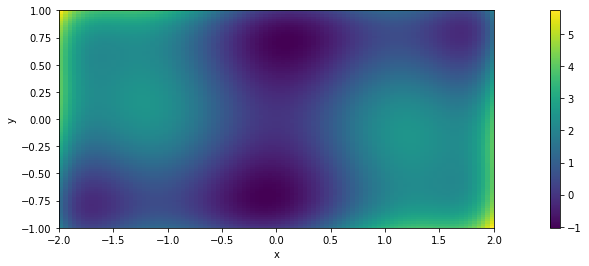

In [5]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def f(x,y):
    return (4-2.1*x**2+(x**4)/3)*x**2+x*y+(4*y**2-4)*y**2
x=np.linspace(-2,2,100)
y=np.linspace(-1,1,100)

fig,ax1 = plt.subplots(nrows=1, ncols=1, figsize = (20,4))
xm,ym = np.meshgrid(x,y,sparse = True)
image = ax1.imshow( f(xm,ym),  extent = [-2, 2, -1, 1])
fig.colorbar(image, ax = ax1)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
print("The minima are approximately (0,0.75) and (0,-0.75)")
print("The maxima are along the borders, in points (-2,1) and (2,-1)")

x1 = 0
y1 =0.75
min1 = scipy.optimize.minimize(f, x0=x1, args=(y1,), method=None)
x2 = 0
y2 =-0.75
min2 = scipy.optimize.minimize(f, x0 = x2, args=(y2,), method=None)
#initial guess = (0,0)
min3 =scipy.optimize.minimize(f, x0 = 0, args=(0,), method=None)

print(min1)
print(min2)

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

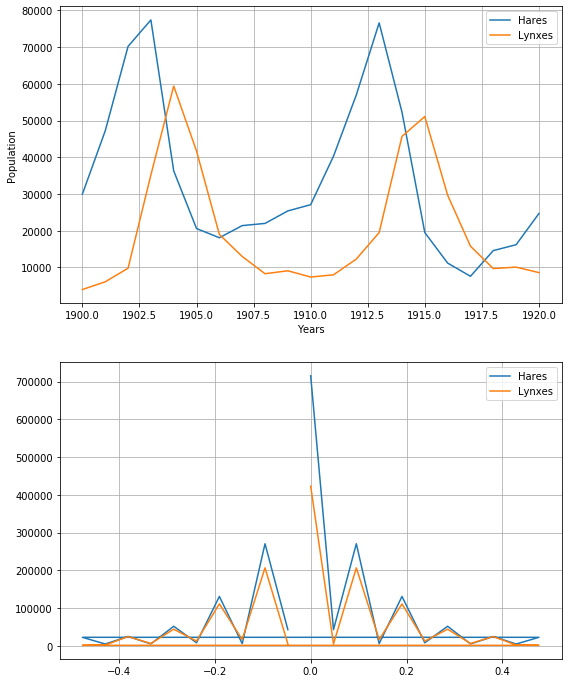

In [29]:
data = np.loadtxt('populations.txt', dtype='float', skiprows=1)
years = np.array(data[:,0])
hares = np.array(data[:,1])
lynxes = np.array(data[:,2])

fig,axs = plt.subplots(nrows=2, ncols=1, figsize = (9,12))

axs[0].plot(years,hares)
axs[0].plot(years,lynxes)
axs[0].legend(["Hares","Lynxes"])
axs[0].grid()
axs[0].set_xlabel('Years')
axs[0].set_ylabel('Population')

from scipy import fftpack

T_step=years[1]-years[0]  #period

H_fft=fftpack.fft(hares)
L_fft=fftpack.fft(lynxes)

freqs=fftpack.fftfreq(hares.size, d=T_step)

axs[1].plot(freqs,abs(H_fft))
axs[1].plot(freqs,abs(L_fft))
axs[1].legend(["Hares","Lynxes"])
axs[1].grid()

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

There is a lot of noise here
The original spectrum of the image is not visible, infact in DFT analysis a log scale is always used to have a better view of results
From the log scale plot, the peaks intensity is in the order of 10e3


Text(0.5, 1.0, 'Filtered Image')

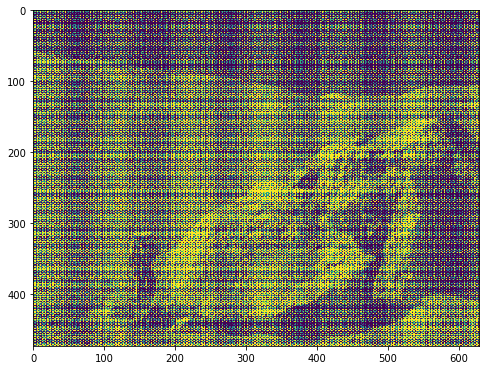

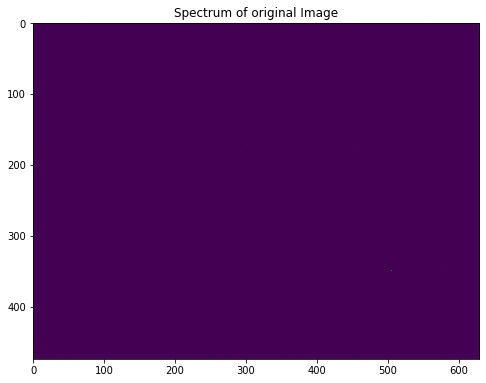

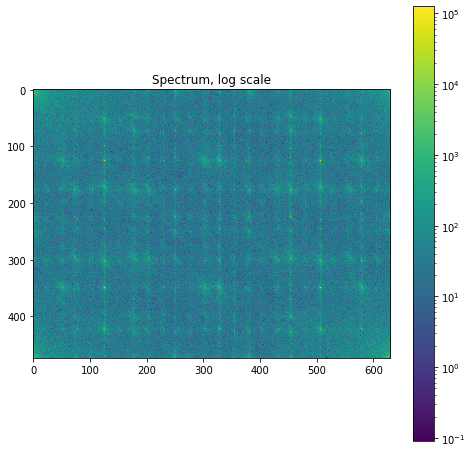

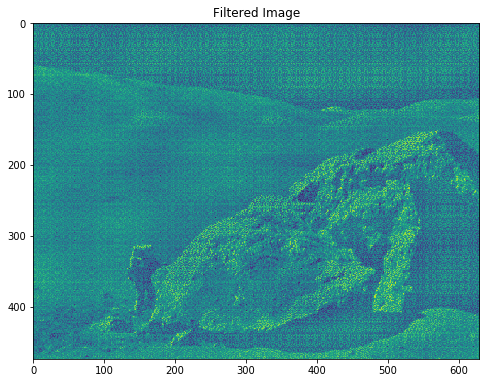

In [61]:
import pylab
from matplotlib.colors import LogNorm

image=pylab.imread('moonlanding.png')

plt.figure(figsize=(8,8))
plt.imshow(image)

print('There is a lot of noise here')

Im_fft=fftpack.fft2(image)

plt.figure(figsize=(8,8))
plt.imshow(np.abs(Im_fft))
plt.title('Spectrum of original Image')

print('The original spectrum of the image is not visible, infact in DFT analysis a log scale is always used to have a better view of results')
fig=plt.figure(figsize=(8,8))
i=plt.imshow(np.abs(Im_fft),  norm=LogNorm(vmin=np.min(np.abs(Im_fft)), vmax=np.max(np.abs(Im_fft))))
plt.title('Spectrum, log scale')
fig.colorbar(i)
print('From the log scale plot, the peaks intensity is in the order of 10e3')

high_freq_fft = Im_fft.copy()
high_freq_fft[np.abs(Im_fft) > 2000] = 0  #filtering
filtered_image = fftpack.ifft2(high_freq_fft).real

plt.figure(figsize=(8,8))
plt.imshow(filtered_image)
plt.title('Filtered Image')